## Standard Nodal Analysis

### Basics

"*Technique for determining **non-reference** node-votages*"

#### Node



A junction or connection point where two or more circuit elements (like resistors, sources, capacitors, etc.) are joined together.

$N_1$ is a node connecting two resistors $R_1$ and $R_2$

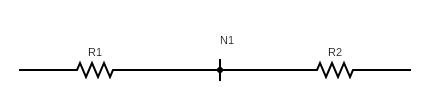

#### Reference vs Non-reference nodes

In any circuit, we pick one node to be our 'ground' or zero-volt point. This is the **reference node**. All other voltages in the circuit are measured *relative to this point*.

The other nodes, like $n_1$ and $n_2$ here, are our **non-reference nodes**. These are the *unknown voltages we want to solve for.*




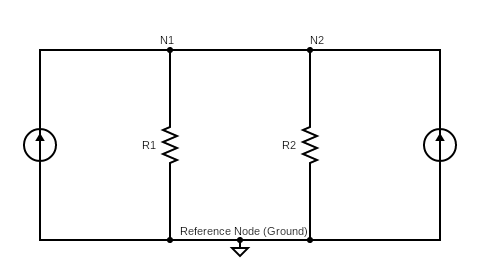

#### Kirchhoff's Current Law


It states that

"*Current entering a node is equal to current leaving the node*"

Mathematically,

$$\sum i_{in} =  \sum i_{out}$$

For diagram below at node 1:

$$ i_1 + i_2 = i_3 + i_4$$

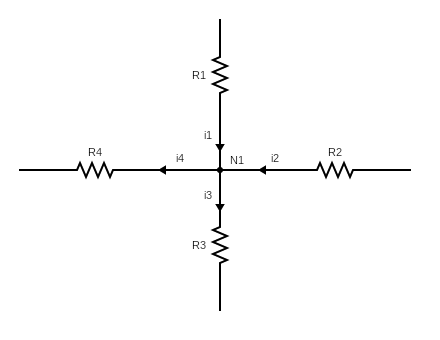

### Mathematical Formulation

From Ohm's Law:

$$V = IR \\[1em]
\Rightarrow I = \frac{V}{R} \\[1em]
\Rightarrow I = GV \\[1em]
\Rightarrow V = G^{-1}I
$$

where
- $G$ is *Nodal conductance* matrix
- $V$ is *Node voltage vector*
- $I$ is *Nodal current vector*

### Steps

1. **Reference Node**: One node is arbitrarily chosen as the reference node (or ground), and its voltage is set to zero ($V_{ref}=0V$). This node is typically the one with the most connections to simplify equation
2. **Unknown Nodes**: All other nodes are labeled with an unknown node voltage variable (e.g., $V_1,\;V_2,\;\dots$), representing the voltage potential with respect to the reference node.

### Derivation

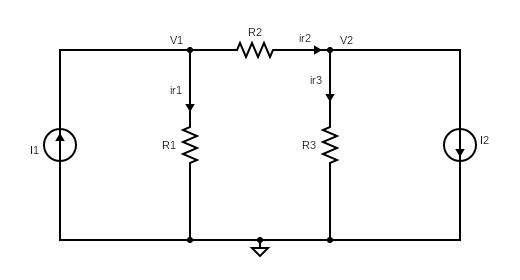

Applying KCL to given circuit:

- *Node1*: &emsp; $i_{r1} + i_{r2} - I_1 = 0$

- *Node2*: &emsp; $-i_{r2} + i_{r3} + I_2 = 0$

Applying Ohm's Law to branch currents we get:

- *Node1*: $\frac{V_1}{R_1} + \frac{(V_1 - V_2)}{R_2} = I_1$

- *Node2*: $- \frac{(V_1 - V_2)}{R_2} + \frac{V_2}{R_3} = -I_2 $

Rearranging terms we get:

- *Node1*: $(\frac{1}{R_1} + \frac{1}{R_2}) V_1 + (-\frac{1}{R_2})V_2 = I_1$ <br>
- *Node2*: $-\frac{1}{R_2}V_1 + (\frac{1}{R_2}+\frac{1}{R_3})V_2 = -I_2 $

We can express in matrix form as:
$$
\begin{bmatrix}
(\frac{1}{R_1} + \frac{1}{R_2}) & -\frac{1}{R_2} \\
-\frac{1}{R_2} & (\frac{1}{R_2}+\frac{1}{R_3})
\end{bmatrix}
\cdot
\begin{bmatrix}
V_1 \\ V_2
\end{bmatrix} =
\begin{bmatrix}
I_1 \\ -I_2
\end{bmatrix}
$$

### Convention

From above derived representation we can observe:
1. *Conductance matrix*:
    1. **Diagonal elements**: positive sum of conductances connected to node 1 or 2.
    2. **Off - Diagonal elements**: -negative of conductances connected between nodes of node 1 and node 2.

2. *Indpendent current source matrix*:
    1. If current enters the node -> **+I**
    2. If current leaves the node -> **-I**

### General Matrix Representation

We generalise the above matrix form to a n-node system:

$$
\begin{bmatrix}
(\frac{1}{r_{1a}} + \frac{1}{r_{1b}} + \dots) & -\frac{1}{r_{12}} & \dots & -\frac{1}{r_{1N}} \\
- \frac{1}{r_{21}} & (\frac{1}{r_{2a}} + \frac{1}{r_{2b}} + \dots) & \dots & -\frac{1}{r_{2N}} \\
\vdots & \vdots & \ddots & \vdots \\
-\frac{1}{r_{N1}} & -\frac{1}{r_{N2}} & \vdots & (\frac{1}{r_{Na}} + \frac{1}{r_{Nb}} + \dots)
\end{bmatrix}
\cdot
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_N
\end{bmatrix}
 =
\begin{bmatrix}
i_1 \\
i_2 \\
\vdots \\
i_N
\end{bmatrix}
$$

###

### Code

In [ ]:
import numpy as np
from typing import List, Dict, Any

In [ ]:
Component = Dict[str, Any]

In [ ]:
def standard_nodal_analyis(components: List[Component])->Dict[str, Any]:
    # Get number of non-reference nodes and seperate components
    n_nodes = 0
    resistor_branches = []
    current_sources = []
    for component in components:
        n_nodes = max(n_nodes, component['n1'], component['n2'])
        if component['type'] == 'R':
            resistor_branches.append(component)
        elif component['type'] == 'I':
            current_sources.append(component)

    # Initialise matrices
    G = np.zeros((n_nodes, n_nodes))
    I = np.zeros((n_nodes, 1))

    for branch in resistor_branches:
        n1, n2 = branch['n1'], branch['n2']
        g = 1 / branch['val']

        # Index - 1 to account for python 0 indexing
        # Fill diagonal elements
        if n1 > 0:
            G[n1-1, n1-1] += g
        if n2 > 0:
            G[n2-1, n2-1] += g

        # Fill off diagonal elements
        if n1 > 0 and n2 > 0:
            G[n1-1, n2-1] -= g
            G[n2-1, n1-1] -= g

    for k, branch in enumerate(current_sources):
        n1, n2 = branch['n1'], branch['n2']
        current_val = branch['val']
        # Current is leaving n1
        if n1 > 0:
            I[n1-1] -= current_val
        # Current is entering n2
        if n2 > 0:
            I[n2 - 1] += current_val

    V = np.linalg.solve(G, I)

    results = {}
    for i in range(n_nodes):
        results[f'V_{i+1}'] = V[i]

    # Calculating branch currents
    for branch in resistor_branches:
        n1, n2 = branch['n1'], branch['n2']
        g = 1 / branch['val']
        Vn1 = V[n1-1, 0] if n1 > 0 else 0
        Vn2 = V[n2-1, 0] if n2 > 0 else 0

        results[f"I_{branch['id']}"] = (Vn1 - Vn2) * g
    return results

### Example

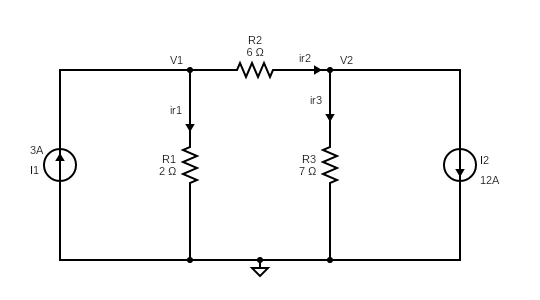

Solving manually first, KCL equations:
- *Node1*: $-I_1 + i_{r1} + i_{r2} = 0$
- *Node2*: $ I_2 - i_{r2} + i_{r3}= 0$

Substitutting node voltages:
- *Node1*: $-I_1 + \frac{V_1}{R_1} + \frac{(V_1 - V_2)}{R_2} = 0$
- *Node2*: $I_2 - \frac{(V_1 - V_2)}{R_2} + \frac{V_2}{R_3} = 0$

Substitutting numerical values:
- *Node1*: $-3 + \frac{V_1}{2} + \frac{(V_1 - V_2)}{6} = 0$
- *Node2*: $12 - \frac{(V_1 - V_2)}{6} + \frac{V_2}{7} = 0$

Simplifying equations:
- *Node1*: $-18 + 3 V_1 + V_1 - V_2 = 0$
- *Node2*: $504 - 7V_1 + 7V_2 + 6V_2 = 0$

Multiplying node equation with 13 and add both equations
- *Node1*: $-234 + 52V_1 - 13V_2=0$
- *Node2*: $504 - 7V_1 + 13V_2 = 0$

Simplifying:

$270 + 45V_1 = 0 \\
\Rightarrow V_1 = -6V \\
\Rightarrow V_2 = -18 + 4\times -6 = -42V
$

Branch Currents:
- $I_1 = \frac{-6}{2} = -3A$
- $I_2 = \frac{-6+42}{6} = 6A$
- $I_3 = \frac{-42}{7} = -6A$

In [ ]:
components = [
    {'id': 'I1', 'type': 'I', 'n1': 0, 'n2': 1, 'val': 3},
    {'id': 'I2', 'type': 'I', 'n1': 2, 'n2': 0, 'val': 12},
    {'id': 'R1', 'type': 'R', 'n1': 0, 'n2': 1, 'val': 2},
    {'id': 'R2', 'type': 'R', 'n1': 1, 'n2': 2, 'val': 6},
    {'id': 'R3', 'type': 'R', 'n1': 2, 'n2': 0, 'val': 7},
]

In [ ]:
results = standard_nodal_analyis(components)

print(f"{'Variable':<30}Value")
for k, v in results.items():
    print(f'{k:<30} {np.round(v, 4)}')

Variable                      Value
V_1                            [-6.]
V_2                            [-42.]
I_R1                           3.0
I_R2                           6.0
I_R3                           -6.0
